In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# <span style="color:orange"> Numerical Simulation Laboratory: Lecture 04 </span>

## Exercise 1: Equilibration
We want to equilibrate a system of particle interacting via LJ potential in every phase, i.e. to evolve it for a sufficient amount of time to get two consecutive configuration that reasonably satisfy the constraints. We start from a perfect FCC configuration in order to avoid divergencies in the potential due to two particles being too close.

Plots are in LJ units with $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu.

In [2]:
def load_T(filename, T, N):
    i=0
    file=open(filename)
    for line in file.readlines():
        k=int(i/N)
        T[k][i%N]=float(line.split()[0])
        i+=1
    file.close()

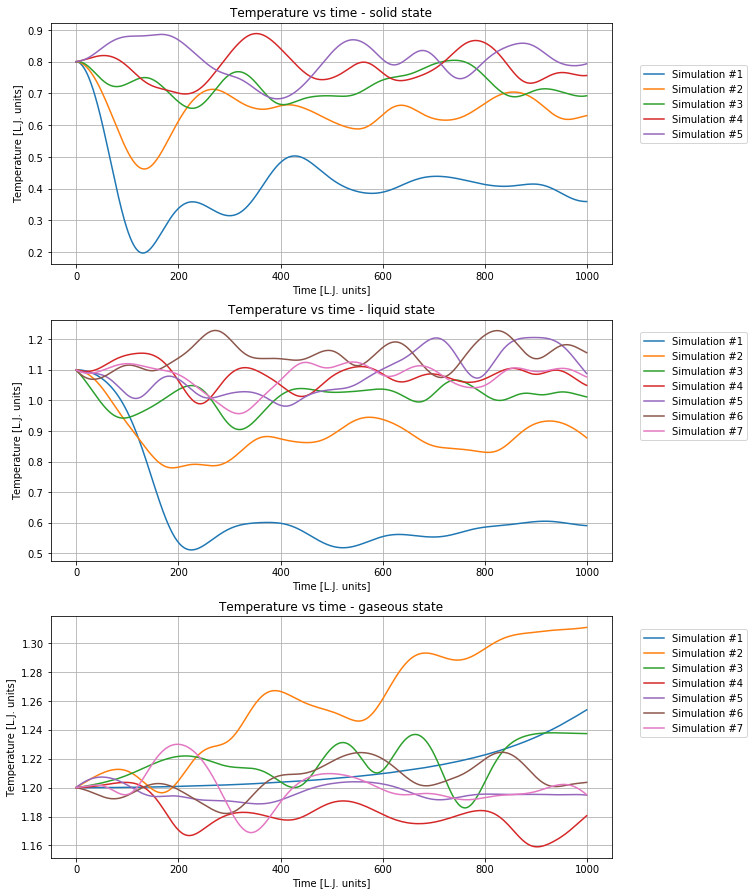

In [3]:
N=1000
Ns=5
Nl=7
Ng=7
x=np.arange(N)
Ts=np.zeros((Ns, N))
Tl=np.zeros((Nl, N))
Tg=np.zeros((Ng, N))

load_T("Es_lezione_04/output_temp_sol.dat", Ts, N)
load_T("Es_lezione_04/output_temp_liq.dat", Tl, N)
load_T("Es_lezione_04/output_temp_gas.dat", Tg, N)

f, canvas=plt.subplots(nrows=3, ncols=1)

for j in range(Ns):
    canvas[0].plot(x, Ts[j], label="Simulation #" + str(j+1))

for j in range(Nl):
    canvas[1].plot(x, Tl[j], label="Simulation #" + str(j+1))
    
for j in range(Nl):
    canvas[2].plot(x, Tg[j], label="Simulation #" + str(j+1))


phase=["solid", "liquid", "gaseous"]
i=0
for c in canvas:
    c.set_title("Temperature vs time - " + phase[i] + " state")
    c.set_xlabel("Time [L.J. units]")
    c.set_ylabel("Temperature [L.J. units]")
    c.grid(True)
    c.legend(loc=(1.05, 0.5))
    i+=1
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.5, top=3, wspace=0.4, hspace=0.23)

We see that, on average after 5 simulations of $1000$ steps, the temperature in all three phases stabilizes around the input value. The settlement is faster for the solid phase since the FCC configuration is much closer to an equilibrum configuration, while it takes some steps longer for the liquid and gas to settle.

## Exercise 3: Molecular Dynamics
We simulate each of the three phase (with the same parameters of Ex 1) for $N=100$ blocks of $L=2000$ steps each. Thanks to the code written in Exercise 2 we are able to compute the energy (total, kinetic and potential) per particle and the temperature with the uncertainty estimated with the blocking method.

Plots are in SI units.

### Solid phase
For the solid phase we use the parameters $\rho^\star=1.1$ and $T^\star=0.8$ in LJ units.

In [4]:
def load_obs(filename, data, err):
    file=open(filename)
    for line in file.readlines():
        l=line.split()
        data.append(float(l[1]))
        err.append(float(l[2]))
    file.close()

In [5]:
sigma=0.34E-9
epsilon=120
m=39.984*1.66054E-27
kB=1.380649E-23
N=100

x=np.arange(N)
Us=[]
errUs=[]
Ks=[]
errKs=[]
Es=[]
errEs=[]
Ts=[]
errTs=[]

load_obs("Es_lezione_04/ave_epot_sol.out", Us, errUs)
load_obs("Es_lezione_04/ave_ekin_sol.out", Ks, errKs)
load_obs("Es_lezione_04/ave_etot_sol.out", Es, errEs)
load_obs("Es_lezione_04/ave_temp_sol.out", Ts, errTs)


Us=[epsilon*kB*E for E in Us]
errUs=[epsilon*kB*errE for errE in errUs]
Ks=[epsilon*kB*E for E in Ks]
errKs=[epsilon*kB*errE for errE in errKs]
Es=[epsilon*kB*E for E in Es]
errEs=[epsilon*kB*errE for errE in errEs]
Ts=[epsilon*t for t in Ts]
errTs=[epsilon*errt for errt in errTs]

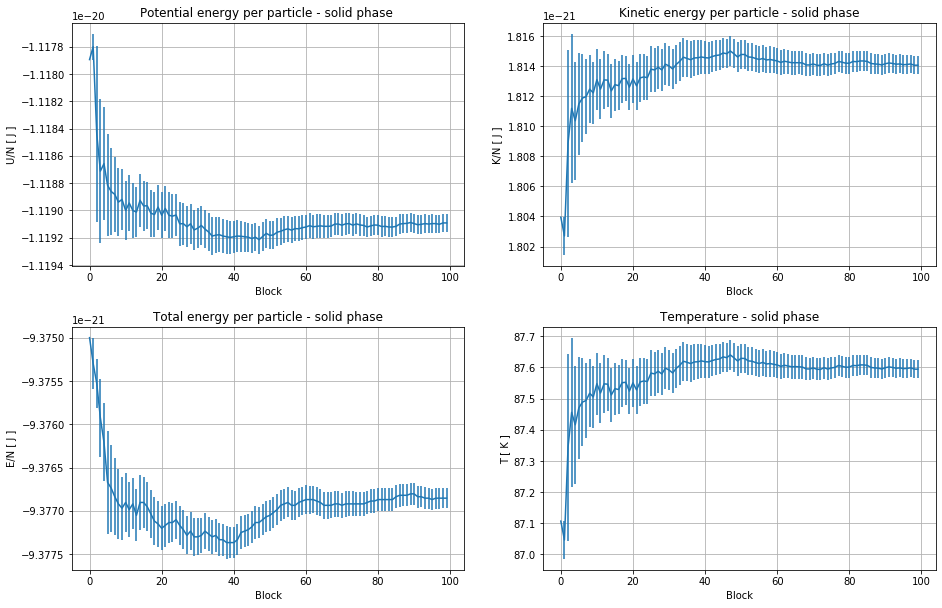

In [6]:
f, canvas=plt.subplots(nrows=2, ncols=2)

canvas[0][0].errorbar(x, Us, yerr=errUs)
canvas[0][0].set_title("Potential energy per particle - solid phase ")
canvas[0][0].set_xlabel("Block")
canvas[0][0].set_ylabel("U/N [ J ]")
canvas[0][0].grid(True)

canvas[0][1].errorbar(x, Ks, yerr=errKs)
canvas[0][1].set_title("Kinetic energy per particle - solid phase")
canvas[0][1].set_xlabel("Block")
canvas[0][1].set_ylabel("K/N [ J ]")
canvas[0][1].grid(True)

canvas[1][0].errorbar(x, Es, yerr=errEs)
canvas[1][0].set_title("Total energy per particle - solid phase")
canvas[1][0].set_xlabel("Block")
canvas[1][0].set_ylabel("E/N [ J ]")
canvas[1][0].grid(True)

canvas[1][1].errorbar(x, Ts, yerr=errTs)
canvas[1][1].set_title("Temperature - solid phase")
canvas[1][1].set_xlabel("Block")
canvas[1][1].set_ylabel("T [ K ]")
canvas[1][1].grid(True)

plt.subplots_adjust(left=0.2, bottom=0.1, right=2.2, top=2, wspace=0.2, hspace=0.25)

The results show a good energy-conservation of the Verlet algorithm. Fluctuations in the totale energy are small as compared to those of the other quantites (approximately $10^{-24}$ J compared to $10^{-23}$ J for the potential and kinetic energy and $0.5$ K for the temperature) and so are the uncertainties ($10^{-5}$ compared to $10^{-4}$ for $U$ and $K$ and $T$ in LJ units).

The temperature is slightly smaller than the one we set as an input ($T^\star\approx 0.73$ instead of $0.8$). However, some fluctuations are to be expected in the microcanonical ensemble.

### Liquid phase
Parameters of the liquid phase are $\rho^\star=0.8$ and $T^\star=1.1$.

In [23]:
Ul=[]
errUl=[]
Kl=[]
errKl=[]
El=[]
errEl=[]
Tl=[]
errTl=[]

load_obs("Es_lezione_04/ave_epot_liq.out", Ul, errUl)
load_obs("Es_lezione_04/ave_ekin_liq.out", Kl, errKl)
load_obs("Es_lezione_04/ave_etot_liq.out", El, errEl)
load_obs("Es_lezione_04/ave_temp_liq.out", Tl, errTl)


Ul=[epsilon*kB*E for E in Ul]
errUl=[epsilon*kB*errE for errE in errUl]
Kl=[epsilon*kB*E for E in Kl]
errKl=[epsilon*kB*errE for errE in errKl]
El=[epsilon*kB*E for E in El]
errEl=[epsilon*kB*errE for errE in errEl]
Tl=[epsilon*t for t in Tl]
errTl=[epsilon*errt for errt in errTl]

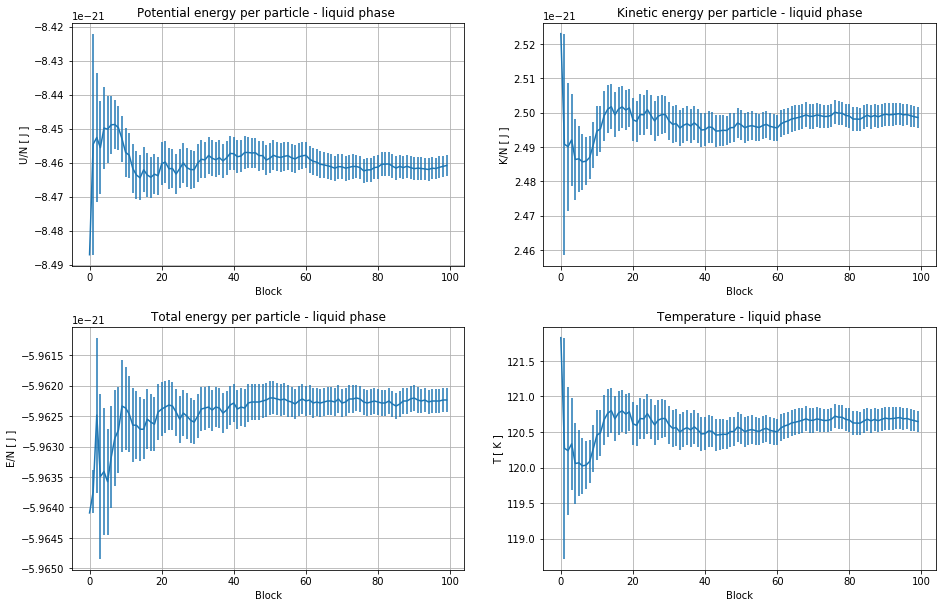

In [38]:
f, canvas=plt.subplots(nrows=2, ncols=2)

canvas[0][0].errorbar(x, Ul, yerr=errUl)
canvas[0][0].set_title("Potential energy per particle - liquid phase ")
canvas[0][0].set_xlabel("Block")
canvas[0][0].set_ylabel("U/N [ J ]")
canvas[0][0].grid(True)

canvas[0][1].errorbar(x, Kl, yerr=errKl)
canvas[0][1].set_title("Kinetic energy per particle - liquid phase")
canvas[0][1].set_xlabel("Block")
canvas[0][1].set_ylabel("K/N [ J ]")
canvas[0][1].grid(True)

canvas[1][0].errorbar(x, El, yerr=errEl)
canvas[1][0].set_title("Total energy per particle - liquid phase")
canvas[1][0].set_xlabel("Block")
canvas[1][0].set_ylabel("E/N [ J ]")
canvas[1][0].grid(True)

canvas[1][1].errorbar(x, Tl, yerr=errTl)
canvas[1][1].set_title("Temperature - liquid phase")
canvas[1][1].set_xlabel("Block")
canvas[1][1].set_ylabel("T [ K ]")
canvas[1][1].grid(True)

plt.subplots_adjust(left=0.2, bottom=0.1, right=2.2, top=2, wspace=0.2, hspace=0.25)

Results show once again energy conservation of the algorithm, even better than what we observed in the solid phase (stability is reached "faster", i.e. with a smaller number of steps).

The temperature is again slightly smaller than the one we set ($T^\star\approx 1$ instead of $1.1$).

### Gaseous phase
Parameter for the gaseous phase are: $\rho^\star=0.05$ and $T^\star=1.2$ .

In [8]:
Ug=[]
errUg=[]
Kg=[]
errKg=[]
Eg=[]
errEg=[]
Tg=[]
errTg=[]

load_obs("Es_lezione_04/ave_epot_gas.out", Ug, errUg)
load_obs("Es_lezione_04/ave_ekin_gas.out", Kg, errKg)
load_obs("Es_lezione_04/ave_etot_gas.out", Eg, errEg)
load_obs("Es_lezione_04/ave_temp_gas.out", Tg, errTg)

Ug=[epsilon*kB*E for E in Ug]
errUg=[epsilon*kB*errE for errE in errUg]
Kg=[epsilon*kB*E for E in Kg]
errKg=[epsilon*kB*errE for errE in errKg]
Eg=[epsilon*kB*E for E in Eg]
errEg=[epsilon*kB*errE for errE in errEg]
Tg=[epsilon*t for t in Tg]
errTg=[epsilon*errt for errt in errTg]

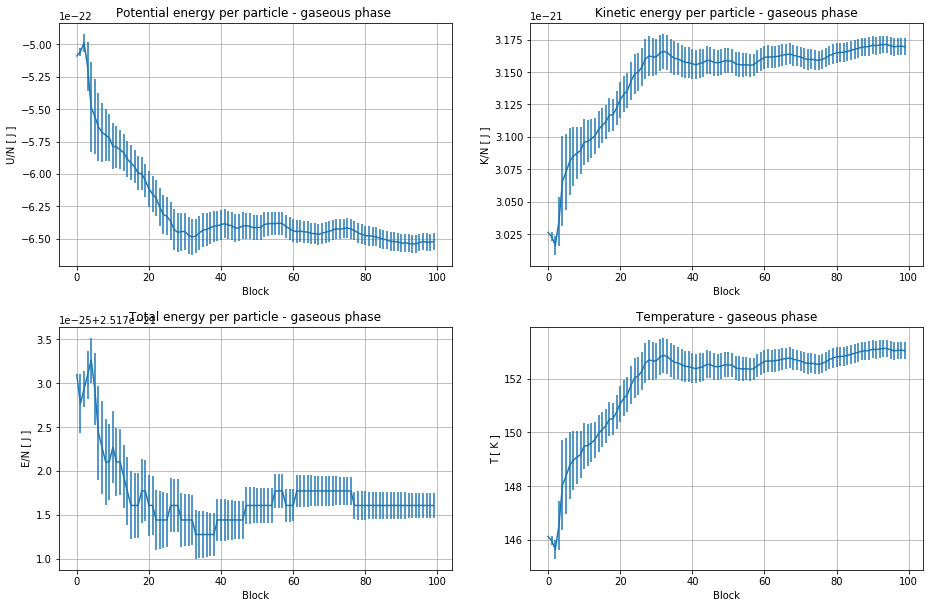

In [9]:
f, canvas=plt.subplots(nrows=2, ncols=2)

canvas[0][0].errorbar(x, Ug, yerr=errUg)
canvas[0][0].set_title("Potential energy per particle - gaseous phase ")
canvas[0][0].set_xlabel("Block")
canvas[0][0].set_ylabel("U/N [ J ]")
canvas[0][0].grid(True)

canvas[0][1].errorbar(x, Kg, yerr=errKg)
canvas[0][1].set_title("Kinetic energy per particle - gaseous phase")
canvas[0][1].set_xlabel("Block")
canvas[0][1].set_ylabel("K/N [ J ]")
canvas[0][1].grid(True)

canvas[1][0].errorbar(x, Eg, yerr=errEg)
canvas[1][0].set_title("Total energy per particle - gaseous phase")
canvas[1][0].set_xlabel("Block")
canvas[1][0].set_ylabel("E/N [ J ]")
canvas[1][0].grid(True)

canvas[1][1].errorbar(x, Tg, yerr=errTg)
canvas[1][1].set_title("Temperature - gaseous phase")
canvas[1][1].set_xlabel("Block")
canvas[1][1].set_ylabel("T [ K ]")
canvas[1][1].grid(True)

plt.subplots_adjust(left=0.2, bottom=0.1, right=2.2, top=2, wspace=0.2, hspace=0.25)

After 20 blocks the total energy is essentially costant compared to the fluctuations of the kinetic and potential energies (see the scale on the $y$-axis of the three graphs).

The temperature is this time higher than the one we set: $T^\star\approx 1.27$ instead of $1.2$ (see that the plot of the temperature rises as the number of blocks increases).